# Importando bibliotecas

In [365]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Aquisição dos dados

In [366]:
# Casos confirmados - coronavírus (global)
url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Mortes - coronavírus (global)
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Casos recuperados - coronavírus
url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [367]:
confirmed_global = pd.read_csv(url_1)
deaths_global = pd.read_csv(url_2)
recovered_global = pd.read_csv(url_3)

# Análise exploratória

In [368]:
confirmed_global.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,6023,6023,6442,6524,6558,6558,6558,6627,6627,6732
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778,8472848
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,352399,353731,355662,358218,361754,364348,366433,367795,370922,374878
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,31941,33071,33933,34418,34976,35520,36031,36474,37023,37426
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,994277,1015495,1033364,1083622,1103219,1121481,1139787,1086483,1098290,1110567


In [369]:
print(f'Número de Linhas: {confirmed_global.shape[0]}')
print(f'Número de Colunas: {confirmed_global.shape[1]}')

Número de Linhas: 280
Número de Colunas: 747


Logo de início já é possível perceber que alguns valores de `Province/State` estão preenchidos com `NaN`. Isso pode ter sido causado por falta de informação na hora de preencher ou pela não necessidade de preencher.

In [370]:
print(f"Número de dados NaN em Province/State: {confirmed_global['Province/State'].isna().sum()}")

Número de dados NaN em Province/State: 193


Países presentes na base de dados:

In [371]:
confirmed_global['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Número de vezes que cada país aparece:

In [372]:
confirmed_global['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Philippines        1
Kosovo             1
Dominica           1
Iran               1
Paraguay           1
Name: Country/Region, Length: 196, dtype: int64

Esses números não refletem a quantidade real já que, como visto antes, há valores `NaN` para Províncias ou Estados, o que indica que pode haver Províncias ou Estados que não reportaram casos o que influencia diretamente na quantidade de aparições dos países.

Uma possível saída para esse problema seria agrupar os valores por país e somar as colunas.

In [373]:
confirmed_global_by_country = confirmed_global.groupby('Country/Region').sum()

confirmed_global_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,6023,6023,6442,6524,6558,6558,6558,6627,6627,6732
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778,8472848
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,352399,353731,355662,358218,361754,364348,366433,367795,370922,374878
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,2287126,2340046,2391062,2457285,2523265,2570523,2607242,2580386,2620532,2644760


É importante ressaltar que as colunas de `Lat` (latitude) e `Long` (longitude) também são de valores numéricos e, ao somar, somamos as latitudes e longitudes. Logo, os valores atuais já não representam mais uma informação valida de latitude e longitude. Sendo assim, podemos retirar esses dados.

In [374]:
confirmed_global_by_country = confirmed_global_by_country.drop(['Lat', 'Long'], axis=1)

confirmed_global_by_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190
Albania,0,0,0,0,0,0,0,0,0,0,...,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240
Algeria,0,0,0,0,0,0,0,0,0,0,...,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885
Andorra,0,0,0,0,0,0,0,0,0,0,...,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315
Angola,0,0,0,0,0,0,0,0,0,0,...,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,6023,6023,6442,6524,6558,6558,6558,6627,6627,6732
Argentina,0,0,0,0,0,0,0,0,0,0,...,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778,8472848
Armenia,0,0,0,0,0,0,0,0,0,0,...,352399,353731,355662,358218,361754,364348,366433,367795,370922,374878
Australia,0,0,0,0,4,5,5,6,9,9,...,2287126,2340046,2391062,2457285,2523265,2570523,2607242,2580386,2620532,2644760


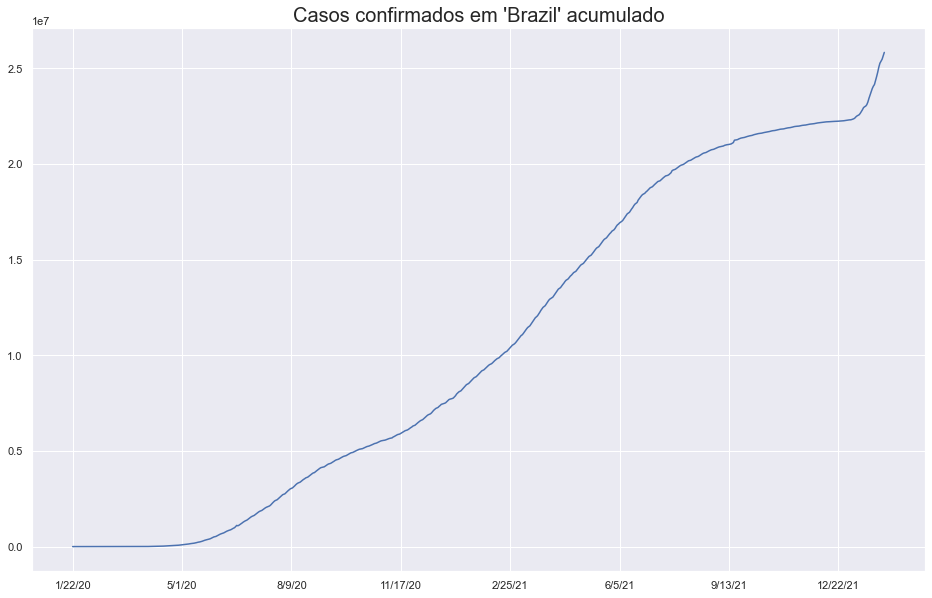

In [375]:
plt.figure(figsize=(16, 10))

confirmed_global_by_country.loc['Brazil'].plot()
plt.title("Casos confirmados em 'Brazil' acumulado", fontsize=20)

plt.show()

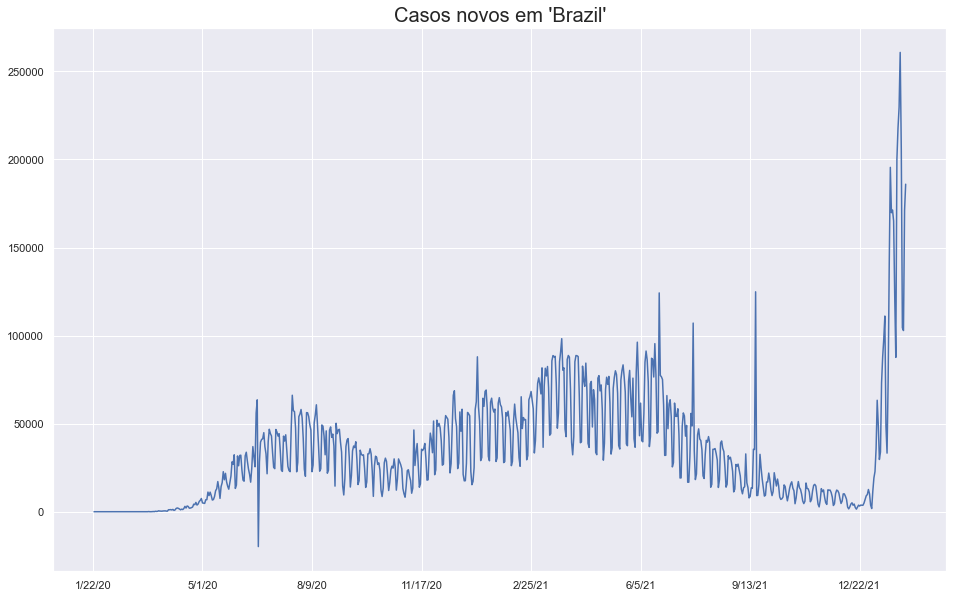

In [376]:
plt.figure(figsize=(16, 10))

confirmed_global_by_country.loc['Brazil'].diff().plot()
plt.title("Casos novos em 'Brazil'", fontsize=20)

plt.show()

Comparar os casos de 10 paises com mais caso no dia mais recente relatado.

In [377]:
last_date = confirmed_global_by_country.iloc[:, -1].name

In [378]:
last_date_country = confirmed_global_by_country[last_date].sort_values(ascending=False)[:10]

last_date_country

Country/Region
US                75680487
India             41803318
Brazil            25820745
France            19998301
United Kingdom    17632062
Russia            11936064
Turkey            11833165
Italy             11235745
Germany           10474992
Spain             10125348
Name: 2/2/22, dtype: int64

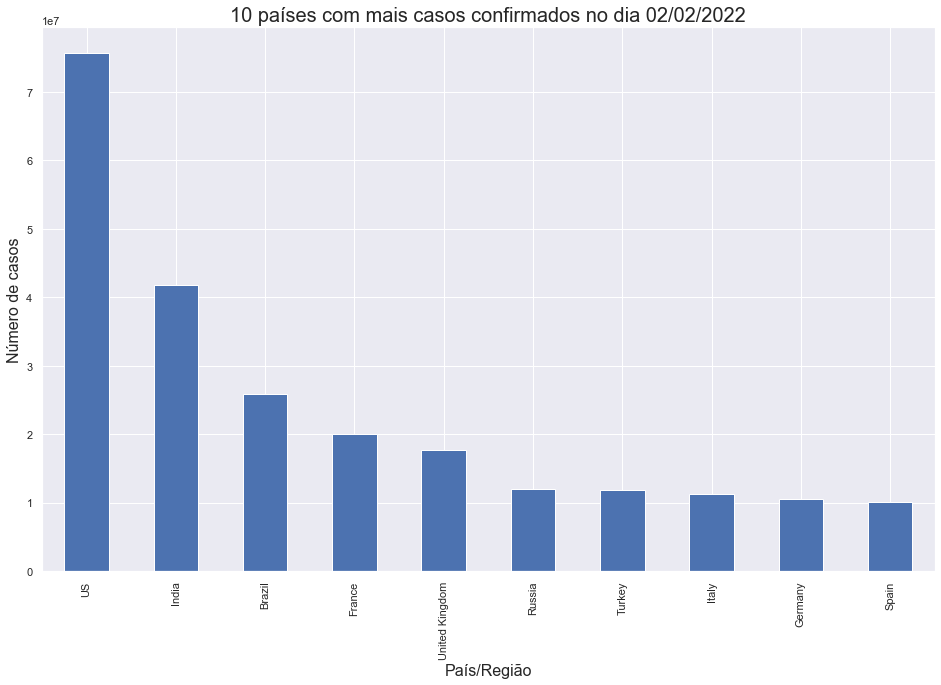

In [379]:
plt.figure(figsize=(16, 10))

last_date_country.plot(kind='bar')
plt.title(f'10 países com mais casos confirmados no dia {pd.to_datetime(last_date).strftime("%d/%m/%Y")}', fontsize=20)

plt.xlabel('País/Região', fontsize=16)
plt.ylabel('Número de casos', fontsize=16)
plt.show()

## Juntando dados

In [380]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:, -1]

In [381]:
latest_by_country(confirmed_global)

Country/Region
Afghanistan            164190
Albania                261240
Algeria                254885
Andorra                 36315
Angola                  98267
                       ...   
Vietnam               2295494
West Bank and Gaza     546176
Yemen                   11113
Zambia                 305959
Zimbabwe               230012
Name: 2/2/22, Length: 196, dtype: int64

In [382]:
latest_by_country(deaths_global)

Country/Region
Afghanistan            7418
Albania                3362
Algeria                6604
Andorra                 146
Angola                 1895
                      ...  
Vietnam               37777
West Bank and Gaza     5116
Yemen                  2018
Zambia                 3921
Zimbabwe               5352
Name: 2/2/22, Length: 196, dtype: int64

In [383]:
latest_by_country(recovered_global)

Country/Region
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
Angola                0
                     ..
Vietnam               0
West Bank and Gaza    0
Yemen                 0
Zambia                0
Zimbabwe              0
Name: 2/2/22, Length: 196, dtype: int64

In [384]:
combined = pd.concat([
    latest_by_country(confirmed_global),
    latest_by_country(deaths_global),
    latest_by_country(recovered_global)
], axis=1)

combined.head(10)

,2/2/22,2/2/22,2/2/22
Country/Region,,,
Afghanistan,164190,7418,0
Albania,261240,3362,0
Algeria,254885,6604,0
Andorra,36315,146,0
Angola,98267,1895,0
Antigua and Barbuda,6732,127,0
Argentina,8472848,121834,0
Armenia,374878,8060,0
Australia,2644760,3987,0


In [385]:
combined.columns = ['confirmed', 'deaths', 'recovered']

combined.head(10)

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,164190,7418,0
Albania,261240,3362,0
Algeria,254885,6604,0
Andorra,36315,146,0
Angola,98267,1895,0
Antigua and Barbuda,6732,127,0
Argentina,8472848,121834,0
Armenia,374878,8060,0
Australia,2644760,3987,0


Por algum motivo os dados de recuperados deixaram de ser atualizados depois de um tempo e vem com valor 0.

In [386]:
combined['recovered'].value_counts()

0    196
Name: recovered, dtype: int64

In [387]:
combined.sum()

confirmed    384859233
deaths         5700923
recovered            0
dtype: int64

Por esse motivo, irei utilizar a data mais recente que ainda havia informação

In [388]:
latest_by_country(confirmed_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan           148933
Albania               133310
Algeria               176724
Andorra                14797
Angola                 43158
                       ...  
Vietnam               181756
West Bank and Gaza    317404
Yemen                   7096
Zambia                197791
Zimbabwe              113526
Name: 8/4/21, Length: 196, dtype: int64

In [389]:
latest_by_country(deaths_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan           6836
Albania               2457
Algeria               4404
Andorra                128
Angola                1026
                      ... 
Vietnam               2327
West Bank and Gaza    3609
Yemen                 1380
Zambia                3430
Zimbabwe              3711
Name: 8/4/21, Length: 196, dtype: int64

In [390]:
latest_by_country(recovered_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan            82586
Albania               130314
Algeria               118409
Andorra                14380
Angola                 39582
                       ...  
Vietnam                54332
West Bank and Gaza    312320
Yemen                   4251
Zambia                189658
Zimbabwe               82994
Name: 8/4/21, Length: 196, dtype: int64

In [391]:
combined_8_4_21 = pd.concat([
    latest_by_country(confirmed_global.loc[:, :'8/4/21']),
    latest_by_country(deaths_global.loc[:, :'8/4/21']),
    latest_by_country(recovered_global.loc[:, :'8/4/21'])
], axis=1)

combined_8_4_21.head(10)

,8/4/21,8/4/21,8/4/21
Country/Region,,,
Afghanistan,148933,6836,82586
Albania,133310,2457,130314
Algeria,176724,4404,118409
Andorra,14797,128,14380
Angola,43158,1026,39582
Antigua and Barbuda,1311,43,1239
Argentina,4975616,106747,4615834
Armenia,230993,4625,220438
Australia,35391,932,24203


In [392]:
combined_8_4_21.columns = ['confirmed', 'deaths', 'recovered']

combined_8_4_21.head(10)

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,148933,6836,82586
Albania,133310,2457,130314
Algeria,176724,4404,118409
Andorra,14797,128,14380
Angola,43158,1026,39582
Antigua and Barbuda,1311,43,1239
Argentina,4975616,106747,4615834
Armenia,230993,4625,220438
Australia,35391,932,24203


### Letalidade em 8/4/2021

#### - Global

In [393]:
sum_up = combined_8_4_21.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']

letality_rate_1 * 100

2.120606639550312

In [394]:
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])

letality_rate_2 * 100

3.1497123300157046

#### - Por país

In [395]:
combined_8_4_21['letality_rate_1'] = combined_8_4_21['deaths'] / combined_8_4_21['confirmed'] * 100
combined_8_4_21['letality_rate_2'] = combined_8_4_21['deaths'] / (combined_8_4_21['recovered'] + combined_8_4_21['deaths']) * 100

combined_8_4_21.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,148933,6836,82586,4.589983,7.644651
Albania,133310,2457,130314,1.843073,1.850555
Algeria,176724,4404,118409,2.492021,3.585940
Andorra,14797,128,14380,0.865040,0.882272
Angola,43158,1026,39582,2.377311,2.526596
Antigua and Barbuda,1311,43,1239,3.279939,3.354134
Argentina,4975616,106747,4615834,2.145403,2.260353
Armenia,230993,4625,220438,2.002225,2.054980
Australia,35391,932,24203,2.633438,3.707977


In [396]:
combined_8_4_21.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,7096,1380,4251,19.447576,24.507192
Peru,2119068,196673,2086086,9.281108,8.615583
Mexico,2901094,242547,2270427,8.360536,9.651791
Sudan,37138,2776,30647,7.474824,8.305658
Syria,26044,1919,22019,7.368300,8.016543
Ecuador,489089,31694,443880,6.480211,6.664368
Egypt,284472,16550,232179,5.817796,6.653828


In [397]:
combined_8_4_21.sort_values('letality_rate_2', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Sweden,1102829,14657,0,1.329037,100.000000
US,35452414,614646,0,1.733721,100.000000
Belgium,1132934,25258,0,2.229433,100.000000
Serbia,723518,7129,0,0.985324,100.000000
United Kingdom,5980887,130300,24693,2.178607,84.068313
Netherlands,1905249,18131,28771,0.951634,38.657200
Spain,4545184,81844,150376,1.800675,35.244165
Vanuatu,4,1,3,25.000000,25.000000
Yemen,7096,1380,4251,19.447576,24.507192


#### Distribuição da letalidade

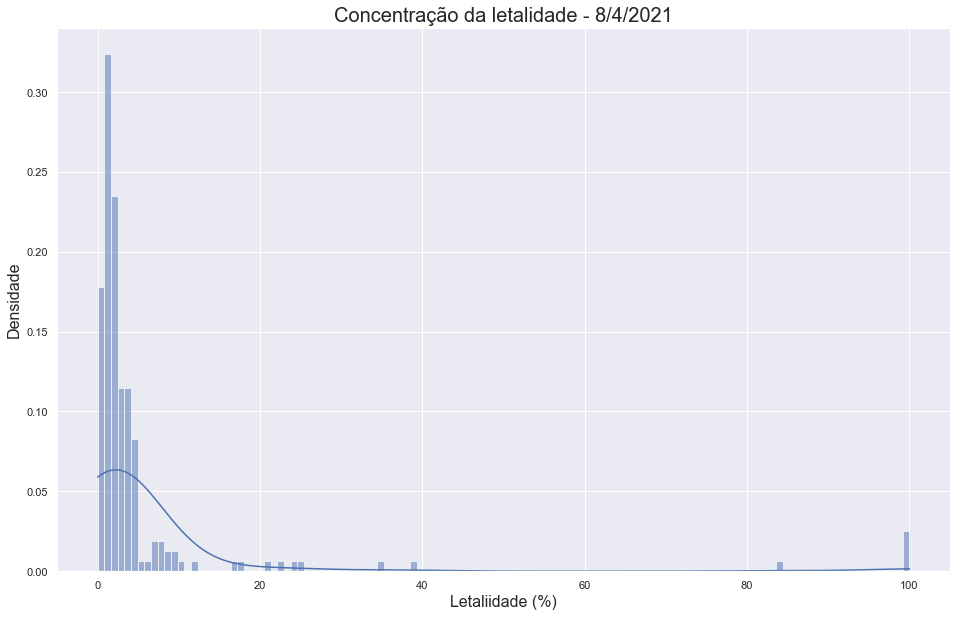

In [398]:
plt.figure(figsize=(16, 10))
sns.histplot(combined_8_4_21['letality_rate_2'], kde=True, stat='density')
plt.xlabel('Letaliidade (%)', fontsize=16)
plt.ylabel('Densidade', fontsize=16)
plt.title('Concentração da letalidade - 8/4/2021', fontsize=20)
plt.show()

Fica evidente, pelo gráfico, que a letalidade até o dia 8/4/2021 se concentra mais da faixa de 0% a 5%. Um possível motivo para países apresentarem uma letalidade alta pode ser, pelo cálculo utilizado(que gera `letality_rate_2`), que até a data de 8/4/2021 não tenham tantos casos recuperados.

## Comparando os EUA com o restante do mundo

No presente dia (2/2/2022) os EUA são o país com maior número de casos confirmados.

In [399]:
is_us = confirmed_global['Country/Region'] == "US"

In [400]:
confirmed_global['is_us'] = is_us

confirmed_global.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,is_us
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,160252,160692,161004,161057,161290,162111,162926,163555,164190,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,248859,251015,252577,254126,254126,255741,258543,258543,261240,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,241406,243568,245698,247568,249310,250774,252117,253520,254885,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,34701,35028,35028,35556,35556,35556,35958,35958,36315,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97594,97812,97901,98029,98057,98076,98116,98226,98267,False
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,6023,6442,6524,6558,6558,6558,6627,6627,6732,False
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778,8472848,False
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,353731,355662,358218,361754,364348,366433,367795,370922,374878,False
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,33071,33933,34418,34976,35520,36031,36474,37023,37426,False
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,1015495,1033364,1083622,1103219,1121481,1139787,1086483,1098290,1110567,False


In [401]:
confirmed_global.query('is_us')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,is_us
255,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,72333439,72980648,73465396,74063641,74232238,74424305,74951445,75350359,75680487,True


In [402]:
confirmed_global.groupby('is_us').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
is_us,,,,,,,,,,,,,,,,,,,,,
False,5563.37955,6157.329414,556,654,939,1432,2113,2922,5573,6161,...,283406484,286572102,289684812,292867178,295888750,298317286,300353906,303440424,306333501,309178746
True,40.00000,-100.000000,1,1,2,2,5,5,5,6,...,71783483,72333439,72980648,73465396,74063641,74232238,74424305,74951445,75350359,75680487


In [403]:
confirmed_global.groupby('is_us').sum()['2/2/22']

is_us
False    309178746
True      75680487
Name: 2/2/22, dtype: int64

In [404]:
confirmed_global['is_us_label'] = np.where(confirmed_global['is_us'], 'EUA', 'Outros')

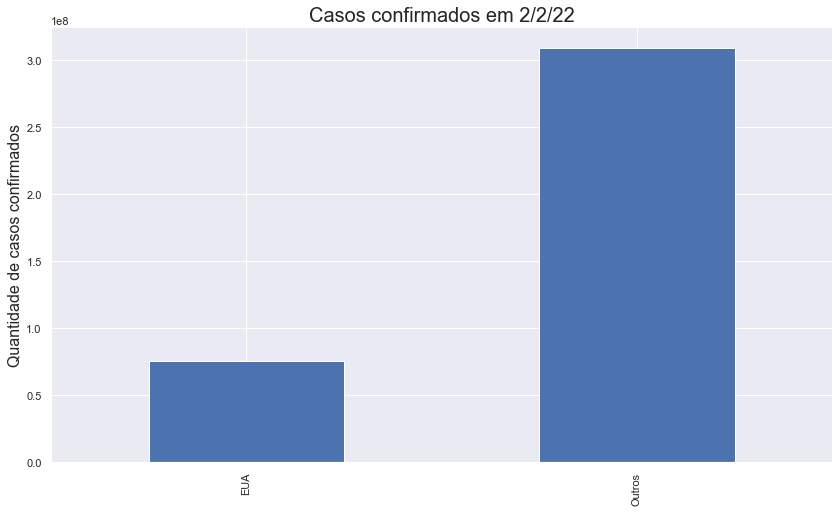

In [405]:
plt.figure(figsize=(14, 8))
confirmed_global.groupby('is_us_label').sum()['2/2/22'].plot(kind='bar')
plt.xlabel('')
plt.ylabel('Quantidade de casos confirmados', fontsize=16)
plt.title(f'Casos confirmados em {last_date}', fontsize=20)
plt.show()

In [406]:
representation_eua = confirmed_global.groupby('is_us').sum()['2/2/22'].iloc[1] / confirmed_global.groupby('is_us').sum()['2/2/22'].sum()

print('O número de casos dos EUA representam, no dia 2/2/2022, {:.2f}% da quantidade de casos total no mundo'.format(representation_eua * 100))

O número de casos dos EUA representam, no dia 2/2/2022, 19.66% da quantidade de casos total no mundo


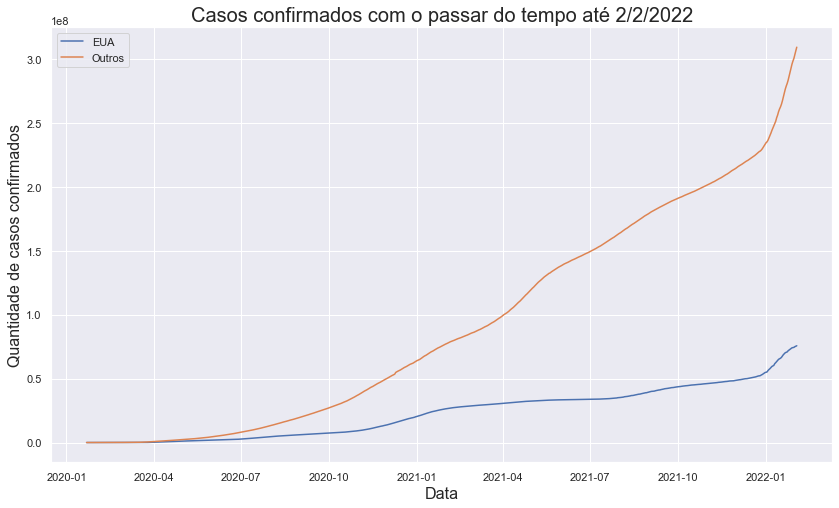

In [407]:
confirmed_evolution = confirmed_global.groupby('is_us_label').sum().loc[:, :'2/2/22'].drop(['Lat', 'Long'], axis=1).T

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=confirmed_evolution,
    x=pd.to_datetime(confirmed_evolution.index),
    y='EUA'
)

sns.lineplot(
    data=confirmed_evolution,
    x=pd.to_datetime(confirmed_evolution.index),
    y='Outros'
)

plt.xlabel('Data', fontsize=16)
plt.ylabel('Quantidade de casos confirmados', fontsize=16)
plt.title('Casos confirmados com o passar do tempo até 2/2/2022', fontsize=20)
plt.legend(['EUA', 'Outros'])
plt.show()

Pelo último gráfico é possível ver que desde o início do ano de 2022 até a presente data, 2/2/2022, tanto os EUA quanto o restante do mundo apresentam uma ascenção no número de casos confirmados.

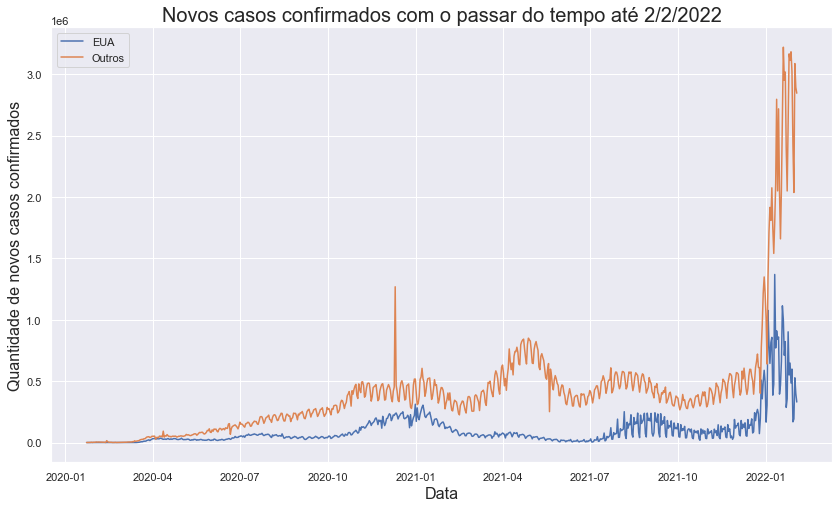

In [408]:
new_cases_evolution = confirmed_global.groupby('is_us_label').sum().loc[:, :'2/2/22'].drop(['Lat', 'Long'], axis=1).T.diff().dropna()

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=new_cases_evolution,
    x=pd.to_datetime(new_cases_evolution.index),
    y='EUA'
)

sns.lineplot(
    data=new_cases_evolution,
    x=pd.to_datetime(new_cases_evolution.index),
    y='Outros'
)

plt.xlabel('Data', fontsize=16)
plt.ylabel('Quantidade de novos casos confirmados', fontsize=16)
plt.title('Novos casos confirmados com o passar do tempo até 2/2/2022', fontsize=20)
plt.legend(['EUA', 'Outros'])
plt.show()

## Taxa de incidência

In [409]:
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_population['PopTotal'] = un_population['PopTotal'] * 1000

un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [410]:
un_population.shape

(280932, 10)

### - Incidência para o ano de 2022

In [411]:
un_population_2022 = un_population.query('Time == 2022')[['Location', 'PopTotal']].groupby('Location').max()

un_population_2022.head()

,PopTotal
Location,
Afghanistan,4.104638e+07
Africa,1.411075e+09
African Group,1.404902e+09
African Union,1.405528e+09
African Union: Central Africa,1.680611e+08


In [412]:
combined.join(un_population_2022)

,confirmed,deaths,recovered,PopTotal
Country/Region,,,,
Afghanistan,164190,7418,0,41046378.0
Albania,261240,3362,0,2907622.0
Algeria,254885,6604,0,45485230.0
Andorra,36315,146,0,78106.0
Angola,98267,1895,0,35132321.0
...,...,...,...,...
Vietnam,2295494,37777,0,NaN
West Bank and Gaza,546176,5116,0,NaN
Yemen,11113,2018,0,31293528.0


In [413]:
combined.join(un_population_2022).sort_values('confirmed', ascending=False)

,confirmed,deaths,recovered,PopTotal
Country/Region,,,,
US,75680487,894316,0,NaN
India,41803318,498983,0,1.410520e+09
Brazil,25820745,629301,0,2.164406e+08
France,19998301,132583,0,6.574951e+07
United Kingdom,17632062,157938,0,6.871878e+07
...,...,...,...,...
MS Zaandam,9,2,0,NaN
Vanuatu,7,1,0,3.226760e+05
Marshall Islands,7,0,0,6.140400e+04


É possível perceber que o `join` não foi perfeito. Isso se deve ao fato das fontes usarem nomes diferentes para representar os países. A exemplo disso, temos os EUA representado na base do coronavírus como <ins>US</ins> e na base da população como <ins>United States of America</ins>.

In [414]:
un_population_2022.query("Location.str.contains('United')")

,PopTotal
Location,
United Arab Emirates,1.016384e+07
United Kingdom,6.871878e+07
United Kingdom (and dependencies),6.902323e+07
United Nations Economic Commission for Africa (UN-ECA),1.404902e+09
United Nations Economic Commission for Latin America and the Caribbean (UN-ECLAC),6.654473e+08
United Nations Economic and Social Commission for Asia and the Pacific (UN-ESCAP) Regions,4.697259e+09
United Nations Member States,7.947980e+09
United Republic of Tanzania,6.346739e+07
United States Virgin Islands,1.048870e+05


In [415]:
un_population_2022.query("Location.str.contains('Russia')")

,PopTotal
Location,
Russian Federation,146191526.0


In [416]:
un_population_2022.rename(index={
    'United States of America' : 'US',
    'Russian Federation': 'Russia'
}, inplace=True)

In [417]:
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,164190,7418,0
Albania,261240,3362,0
Algeria,254885,6604,0
Andorra,36315,146,0
Angola,98267,1895,0
...,...,...,...
Vietnam,2295494,37777,0
West Bank and Gaza,546176,5116,0
Yemen,11113,2018,0


In [418]:
combined = combined.join(un_population_2022).sort_values('confirmed', ascending=False)

combined.head(10)

,confirmed,deaths,recovered,PopTotal
Country/Region,,,,
US,75680487,894316,0,3.358600e+08
India,41803318,498983,0,1.410520e+09
Brazil,25820745,629301,0,2.164406e+08
France,19998301,132583,0,6.574951e+07
United Kingdom,17632062,157938,0,6.871878e+07
Russia,11936064,325986,0,1.461915e+08
Turkey,11833165,87831,0,8.615580e+07
Italy,11235745,147320,0,6.067054e+07
Germany,10474992,118339,0,8.424058e+07


Segundo o "Indicadores de Saúde - Elementos conceituais e práticos", que tem como base a Organização Pan-Americana da Saúde e a Organização Mundial da Saúde, estarei considerando o número de confirmados pela população total do país

In [419]:
combined['incidence_ratio'] = combined['confirmed'] / combined['PopTotal']

combined.head(10)

,confirmed,deaths,recovered,PopTotal,incidence_ratio
Country/Region,,,,,
US,75680487,894316,0,3.358600e+08,0.225333
India,41803318,498983,0,1.410520e+09,0.029637
Brazil,25820745,629301,0,2.164406e+08,0.119297
France,19998301,132583,0,6.574951e+07,0.304159
United Kingdom,17632062,157938,0,6.871878e+07,0.256583
Russia,11936064,325986,0,1.461915e+08,0.081647
Turkey,11833165,87831,0,8.615580e+07,0.137346
Italy,11235745,147320,0,6.067054e+07,0.185193
Germany,10474992,118339,0,8.424058e+07,0.124346


A taxa de incidência é comum de ser reportada a cada 100000 habitantes.

In [420]:
combined['incidence_ratio'] = combined['confirmed'] / combined['PopTotal'] * 100000

combined.head(10)

,confirmed,deaths,recovered,PopTotal,incidence_ratio
Country/Region,,,,,
US,75680487,894316,0,3.358600e+08,22533.346511
India,41803318,498983,0,1.410520e+09,2963.680770
Brazil,25820745,629301,0,2.164406e+08,11929.716298
France,19998301,132583,0,6.574951e+07,30415.894982
United Kingdom,17632062,157938,0,6.871878e+07,25658.286551
Russia,11936064,325986,0,1.461915e+08,8164.675701
Turkey,11833165,87831,0,8.615580e+07,13734.612976
Italy,11235745,147320,0,6.067054e+07,18519.276407
Germany,10474992,118339,0,8.424058e+07,12434.615241
